Products:


,id,name,price,inventory
0,1,Latte,1.50,102
1,2,Espresso,1.75,122
2,3,Cappuccino,2.00,87
3,4,Americano,1.25,152
4,5,Mocha,2.50,62
5,6,Macchiato,2.25,72
6,7,Flat White,2.00,52
7,8,Black Coffee,1.00,202
8,9,Cold Brew,2.75,42
9,10,Frappuccino,3.00,31


Couriers:


,id,name,phone
0,36,DHL,03005478594
1,37,FedEx,08007886542
2,38,UPS,09004561234
3,39,USPS,02003451234
4,40,Amazon Logistics,08001234567
5,41,DPD,07006547895
6,42,Parcelforce,03001236547
7,43,TNT,05007895412
8,44,Hermes,06004561234


Customers:


,id,name,address,phone
0,1,Emily Johnson,"12 High Street, Birmingham, B1 1AA",07889856428
1,2,James Smith,"34 Oak Avenue, London, E5 2PT",07987456321
2,3,Sophia Brown,"56 Elm Road, Manchester, M12 5BQ",07712345678
3,4,Michael White,"78 Pine Street, Liverpool, L8 4RT",07654321987
4,5,Olivia Green,"90 Cedar Lane, Bristol, BS1 4DJ",07598765432
5,6,William Harris,"22 Maple Court, Leeds, LS2 9FF",07487654321
6,7,Ava Clark,"44 Birch Drive, Sheffield, S3 7TT",07345678901
7,8,Henry Walker,"66 Ash Close, Edinburgh, EH1 2AB",07234567890
8,9,Isabella King,"88 Willow Way, Glasgow, G1 3DE",07123456789
9,10,Lucas Wright,"10 Cherry Path, Cardiff, CF1 4GH",07901234567


Orders:


,id,customer_name,address,phone,courier_name,status
0,48,Emily Johnson,"12 High Street, Birmingham, B1 1AA",07889856428,DHL,PREPARING
1,51,Michael White,"78 Pine Street, Liverpool, L8 4RT",07654321987,USPS,PREPARING
2,54,Ava Clark,"44 Birch Drive, Sheffield, S3 7TT",07345678901,Parcelforce,PREPARING
3,67,Lucas Wright,"10 Cherry Path, Cardiff, CF1 4GH",07901234567,DHL,PREPARING
4,49,James Smith,"34 Oak Avenue, London, E5 2PT",07987456321,FedEx,READY
5,52,Olivia Green,"90 Cedar Lane, Bristol, BS1 4DJ",07598765432,Amazon Logistics,READY
6,65,Henry Walker,"66 Ash Close, Edinburgh, EH1 2AB",07234567890,TNT,READY
7,50,Sophia Brown,"56 Elm Road, Manchester, M12 5BQ",07712345678,UPS,DELIVERED
8,53,William Harris,"22 Maple Court, Leeds, LS2 9FF",07487654321,DPD,DELIVERED
9,56,Isabella King,"88 Willow Way, Glasgow, G1 3DE",07123456789,Hermes,DELIVERED


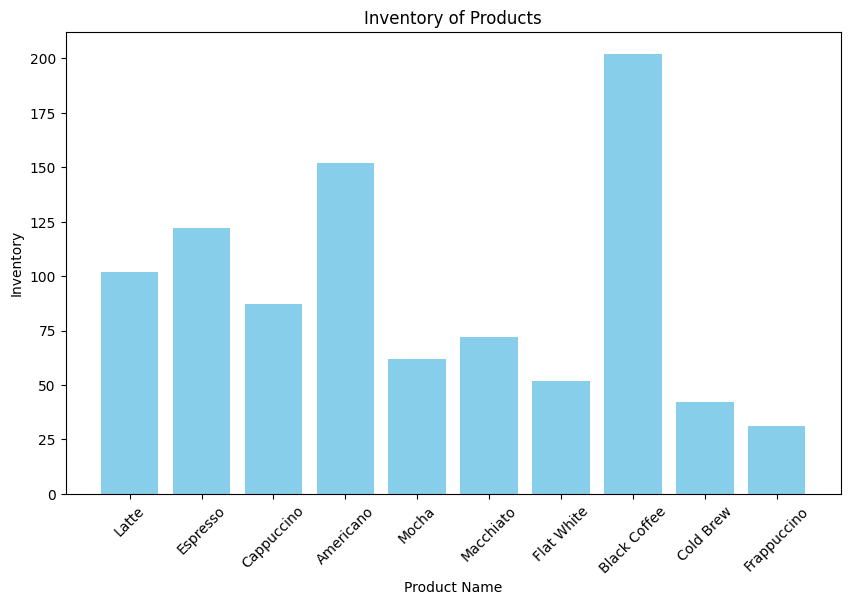

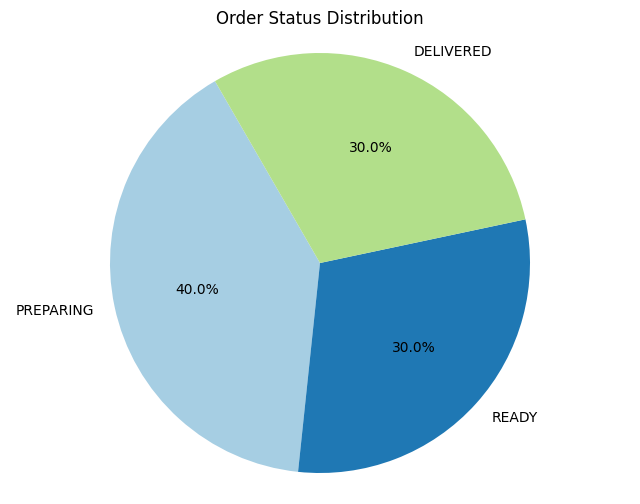

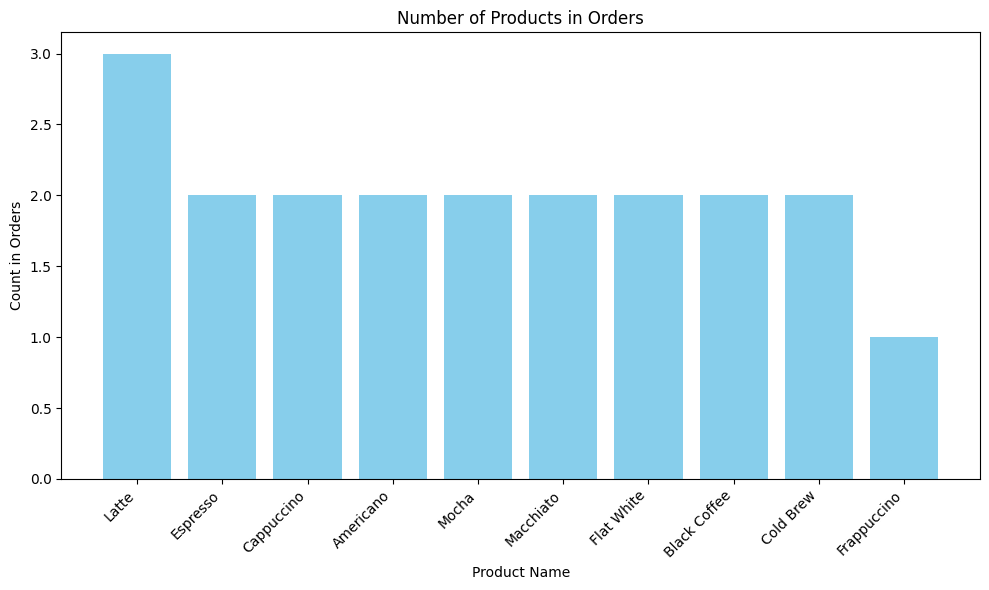

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

def get_db_connection():
    try:
        conn = mysql.connector.connect(
            host="localhost",
            port=3306,
            user=os.getenv("MYSQL_USER"),
            password=os.getenv("MYSQL_PASSWORD"),
            database=os.getenv("MYSQL_DATABASE")
        )
        conn.autocommit = True
        return conn
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        exit(1)

def fetch_data(query):
    conn = get_db_connection()
    cursor = conn.cursor(dictionary=True)
    cursor.execute(query)
    data = cursor.fetchall()
    cursor.close()
    conn.close()
    return pd.DataFrame(data)

# Fetching data from the database
products = fetch_data("SELECT * FROM products")
couriers = fetch_data("SELECT * FROM couriers")
customers = fetch_data("SELECT * FROM customers")
orders = fetch_data("""
    SELECT o.id, c.name AS customer_name, c.address, c.phone, cr.name AS courier_name, os.order_status AS status
    FROM orders o
    JOIN customers c ON o.customer_id = c.id
    JOIN couriers cr ON o.courier = cr.id
    JOIN order_status os ON o.status = os.id
""")
# Display the data
print("Products:")
display(products)
print("Couriers:")
display(couriers)
print("Customers:")
display(customers)
print("Orders:")
display(orders)

# Visualization
def plot_inventory(products):
    plt.figure(figsize=(10, 6))
    plt.bar(products['name'], products['inventory'], color='skyblue')
    plt.xlabel('Product Name')
    plt.ylabel('Inventory')
    plt.title('Inventory of Products')
    plt.xticks(rotation=45)
    plt.show()

def plot_order_status(orders):
    status_counts = orders['status'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=120, colors=plt.cm.Paired.colors)
    plt.title('Order Status Distribution')
    plt.axis('equal')
    plt.show()

# Plot inventory
plot_inventory(products)

# Plot order status distribution
plot_order_status(orders)

# Fetching product counts in orders
def get_product_counts_in_orders():
    query = """
    SELECT p.name AS product_name, COUNT(oi.product_id) AS order_count
    FROM order_items oi
    JOIN products p ON oi.product_id = p.id
    GROUP BY oi.product_id, p.name
    ORDER BY order_count DESC
    """
    return fetch_data(query)

# Plot products in orders
def plot_products_in_orders(product_counts):
    plt.figure(figsize=(10, 6))
    plt.bar(product_counts['product_name'], product_counts['order_count'], color='skyblue')
    plt.xlabel('Product Name')
    plt.ylabel('Count in Orders')
    plt.title('Number of Products in Orders')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Fetch data and plot the graph
product_counts_in_orders = get_product_counts_in_orders()
plot_products_in_orders(product_counts_in_orders)
